## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import regex as re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import csv
import langid
from chardet import detect
from spellchecker import SpellChecker
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


## Loading all Datasets

In [2]:
dataset_pre = pd.read_csv('Datasets/PreElection.csv')

In [3]:
dataset_dr = pd.read_csv('Datasets/DuringElection.csv')

In [4]:
dataset_post = pd.read_csv('Datasets/PostElection.csv')

## Understanding the Data

### Pre-Election

In [5]:
dataset_pre.head()

,Tweet,Username,Date
0,A year ago! Any progress from the winning cand...,youth4climatePH,5/5/2022
1,"Bongbong Marcos, Sara Duterte express deepest ...",BayanihanToday,5/4/2022
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...,pjmscheesecake_,5/7/2022
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...,Wonderwomanneph,5/4/2022
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...,queen_pinksss,5/7/2022


In [6]:
dataset_pre.shape

(5011, 3)

In [7]:
dataset_pre.dtypes

Tweet       object
Username    object
Date        object
dtype: object

In [8]:
dataset_pre.describe()

,Tweet,Username,Date
count,5011,5011,5011
unique,3959,2483,13
top,"Kung walang mabuting kandidato, pwede bang mag...",ABSCBNNews,5/5/2022
freq,7,172,928


In [9]:
dataset_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     5011 non-null   object
 1   Username  5011 non-null   object
 2   Date      5011 non-null   object
dtypes: object(3)
memory usage: 117.6+ KB


In [10]:
dataset_pre.isna().sum()

Tweet       0
Username    0
Date        0
dtype: int64

### During Election

In [11]:
dataset_dr.head()

,Tweet,Username,Date
0,Comelec says there are onsite technicians in p...,@cnnphilippines,5/9/2022
1,"The campaign period already ended on May 7, bu...",@cnnphilippines,5/9/2022
2,Comelec advises the public that all complaints...,@cnnphilippines,5/9/2022
3,The 2022 national elections is proceeding with...,@cnnphilippines,5/9/2022
4,WATCH: Bongbong Marcos casting his ballot in B...,@cnnphilippines,5/9/2022


In [12]:
dataset_dr.shape

(4991, 3)

In [13]:
dataset_dr.dtypes

Tweet       object
Username    object
Date        object
dtype: object

In [14]:
dataset_dr.describe()

,Tweet,Username,Date
count,4991,4991,4991
unique,3742,2064,1
top,#Eleksyon2022,@ABSCBNNews,5/9/2022
freq,22,116,4991


In [15]:
dataset_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     4991 non-null   object
 1   Username  4991 non-null   object
 2   Date      4991 non-null   object
dtypes: object(3)
memory usage: 117.1+ KB


In [16]:
dataset_dr.isna().sum()

Tweet       0
Username    0
Date        0
dtype: int64

### Post-Election

In [17]:
dataset_post.head()

,Tweet,Username,Date
0,Online info on government websites going down?...,Jauain,5/16/2022
1,"NEWS REPORT: Tonight, at exactly 11:19 PM, Vic...",PhilippinePDNS,5/16/2022
2,JUST IN: Former COMELEC Chairman Andy Bautista...,PhilippinePDNS,5/16/2022
3,"Lahat ng COC sa #Halalan2022 maliban sa isa, n...",updatesmanila,5/16/2022
4,BREAKING NEWS: COMELEC will proclaim the winni...,GreenGiantFM,5/16/2022


In [18]:
dataset_post.shape

(6641, 3)

In [19]:
dataset_post.dtypes

Tweet       object
Username    object
Date        object
dtype: object

In [20]:
dataset_post.describe()

,Tweet,Username,Date
count,6641,6641,6641
unique,5865,2484,21
top,#Halalan2022,news5ph,5/11/2022
freq,19,371,2222


In [21]:
dataset_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     6641 non-null   object
 1   Username  6641 non-null   object
 2   Date      6641 non-null   object
dtypes: object(3)
memory usage: 155.8+ KB


In [22]:
dataset_post.isna().sum()

Tweet       0
Username    0
Date        0
dtype: int64

## Combining the Datasets

In [23]:
# 1 Combine all datasets

dataset = pd.concat([dataset_pre, dataset_dr, dataset_post], ignore_index=True)
dataset

,Tweet,Username,Date
0,A year ago! Any progress from the winning cand...,youth4climatePH,5/5/2022
1,"Bongbong Marcos, Sara Duterte express deepest ...",BayanihanToday,5/4/2022
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...,pjmscheesecake_,5/7/2022
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...,Wonderwomanneph,5/4/2022
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...,queen_pinksss,5/7/2022
...,...,...,...
16638,Dictator Ferdinand Marcos from the Philippines...,tayomuna,5/28/2022
16639,This election rewrites history. People voted f...,kollenedoncillo,5/28/2022
16640,"Hey, it’s a free country. No one has monopoly ...",joel_gregorio,5/28/2022
16641,HALA-lan. \n\n#Election2022PH,keithjumaani,5/29/2022


In [24]:
dataset.shape

(16643, 3)

## Data Cleaning

In [25]:
#Raw Combined Dataset
dataset

,Tweet,Username,Date
0,A year ago! Any progress from the winning cand...,youth4climatePH,5/5/2022
1,"Bongbong Marcos, Sara Duterte express deepest ...",BayanihanToday,5/4/2022
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...,pjmscheesecake_,5/7/2022
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...,Wonderwomanneph,5/4/2022
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...,queen_pinksss,5/7/2022
...,...,...,...
16638,Dictator Ferdinand Marcos from the Philippines...,tayomuna,5/28/2022
16639,This election rewrites history. People voted f...,kollenedoncillo,5/28/2022
16640,"Hey, it’s a free country. No one has monopoly ...",joel_gregorio,5/28/2022
16641,HALA-lan. \n\n#Election2022PH,keithjumaani,5/29/2022


In [26]:
#1 Drop unnecessary columns

dataset.drop(['Date','Username'], axis=1, inplace=True)
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
16638,Dictator Ferdinand Marcos from the Philippines...
16639,This election rewrites history. People voted f...
16640,"Hey, it’s a free country. No one has monopoly ..."
16641,HALA-lan. \n\n#Election2022PH


In [27]:
#Get the exact duplicate tweets in the dataframe
print("Duplicate Tweets:", len(dataset['Tweet'])-len(dataset['Tweet'].drop_duplicates()))

Duplicate Tweets: 3085


In [28]:
dups = dataset["Tweet"]
dups_listed = dataset[dups.isin(dups[dups.duplicated()])].sort_values("Tweet")
print(dups_listed)

                                                   Tweet
4578     @biancadava\rLOOK: Members of the deaf commu...
3546     @biancadava\rLOOK: Members of the deaf commu...
3681     @mommydotsorry\r#Halalan2022 #UniteamBBMSara...
4212     @mommydotsorry\r#Halalan2022 #UniteamBBMSara...
3572     @nujp\rThis elections, never forget those wh...
...                                                  ...
3790   🚨HALALAN 2022 ADVICE🚨\rplease! wag kayong papa...
11309  🤠Alrite let's discuss the Top 10-14 candidates...
15021  🤠Alrite let's discuss the Top 10-14 candidates...
110    🧵on 🇹🇼#Halalan2022| I’m sorry for failing y’al...
784    🧵on 🇹🇼#Halalan2022| I’m sorry for failing y’al...

[5406 rows x 1 columns]


In [29]:
# 2 Remove Exact Duplicate Tweets
# Drop the last duplicate and keep the first one
# Reset column index

dataset.drop_duplicates(subset='Tweet', keep="first", inplace=True)
dataset = dataset.reset_index()

In [30]:
# Drop old index column
dataset.drop(['index'], axis=1, inplace=True)
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM❤️ SARA DUTERTE💚 ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
13553,Dictator Ferdinand Marcos from the Philippines...
13554,This election rewrites history. People voted f...
13555,"Hey, it’s a free country. No one has monopoly ..."
13556,HALA-lan. \n\n#Election2022PH


In [31]:
#Store a copy of datasets with emojis before transformation

dataset_emojis = dataset['Tweet']

In [32]:
# Get the percentage of emojis in the dataset
def calculate_percentage_of_emojis(text):
    emoji_pattern = re.compile(r'\p{Emoji}')
    
    emojis = emoji_pattern.findall(text)
    
    # Calculate the percentage of Unicode emojis
    total_chars = len(text)
    if total_chars > 0:
        percentage = (len(emojis) / total_chars) * 100
    else:
        percentage = 0
    return percentage

overall_percentage_of_emojis = dataset['Tweet'].apply(calculate_percentage_of_emojis).mean()

print(f"Overall Percentage of Emojis in the Dataset: {overall_percentage_of_emojis:.2f}%")

Overall Percentage of Emojis in the Dataset: 7.50%


In [33]:
# 3 Transform Emojis to Text
def transform_emojis(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    return text

dataset['Tweet'] = dataset['Tweet'].apply(transform_emojis)
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM red_heart SARA ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
13553,Dictator Ferdinand Marcos from the Philippines...
13554,This election rewrites history. People voted f...
13555,"Hey, it’s a free country. No one has monopoly ..."
13556,HALA-lan. \n\n#Election2022PH


In [34]:
# 4 Replace "#" with the word "hashtag" in the "Tweets" column
dataset['Tweet'] = dataset['Tweet'].str.replace("#", "hashtag")
dataset

,Tweet
0,A year ago! Any progress from the winning cand...
1,"Bongbong Marcos, Sara Duterte express deepest ..."
2,I decide I only vote for\rBBM red_heart SARA ...
3,Mr. Bbm and Ms. Sara Duterte are obviously wil...
4,THE CROWD IS INSANE. BBM YOULL FOREVER BE INSA...
...,...
13553,Dictator Ferdinand Marcos from the Philippines...
13554,This election rewrites history. People voted f...
13555,"Hey, it’s a free country. No one has monopoly ..."
13556,HALA-lan. \n\nhashtagElection2022PH


In [35]:
# 5 Remove non-alphanumeric characters, spaces & links
def clean_text(text):
    text = text.replace('?', ' ').replace('!', ' ') # Remove question marks, exclamation points
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # Remove mention tags
    text = text.replace('\n', ' ') # Remove newline characters

    # Remove all non-alphanumeric characters except hashtags, underscores, and spaces
    text = re.sub(r'[^a-zA-Z0-9_#\s]', '', text)

# Remove words containing "http" and "https"
    text = ' '.join([word for word in text.split() if not re.search(r'https', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'http', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'youtube', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'vanBF1_BCyyo', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'story_fbid', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'listOLAK5uy', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'edition_id', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'News5GVGregorio', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'utm_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'fbclid', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p23', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p24', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p25', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'category_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'v_DUc7', word)])
    
    text = text.replace('...', ' ') # Remove ellipses
    text = ' '.join(text.split()) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing spaces
    return text

dataset['Tweet'] = dataset['Tweet'].apply(clean_text)
print(dataset)

                                                   Tweet
0      A year ago Any progress from the winning candi...
1      Bongbong Marcos Sara Duterte express deepest g...
2      I decide I only vote for BBM red_heart SARA DU...
3      Mr Bbm and Ms Sara Duterte are obviously will ...
4      THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...
...                                                  ...
13553  Dictator Ferdinand Marcos from the Philippines...
13554  This election rewrites history People voted fo...
13555  Hey its a free country No one has monopoly of ...
13556                      HALAlan hashtagElection2022PH
13557  Cheating malalim na sugat kahit mahilom mahira...

[13558 rows x 1 columns]


In [36]:
# Check for Duplicate Tweets after cleaning of non-alphanumeric characters, spaces & links
print("Duplicate Tweets:", len(dataset['Tweet'])-len(dataset['Tweet'].drop_duplicates()))

Duplicate Tweets: 271


In [37]:
dups2 = dataset["Tweet"]
dups_listed2 = dataset[dups2.isin(dups2[dups2.duplicated()])].sort_values("Tweet")
print(dups_listed2)

                                                   Tweet
3862   10 sample ballots were shaded Some had undervo...
600    10 sample ballots were shaded Some had undervo...
12039  2022 PH Election Mandaluyong City 12 Similar t...
8672   2022 PH Election Mandaluyong City 12 Similar t...
8318   23 Interestingly Leni had her worst performanc...
...                                                  ...
3237   high_voltage The Philippine election is just d...
4992   libreng sakay for everyone here at Marilao Bul...
4697   libreng sakay for everyone here at Marilao Bul...
10637  oh why oh why when can we ever learn and rejec...
9057   oh why oh why when can we ever learn and rejec...

[511 rows x 1 columns]


In [38]:
# Drop the last duplicate and keep the first one
# Reset column index

dataset.drop_duplicates(subset='Tweet', keep="first", inplace=True)
dataset = dataset.reset_index()

In [39]:
# Drop old index column 
dataset.drop(['index'], axis=1, inplace=True)
dataset

,Tweet
0,A year ago Any progress from the winning candi...
1,Bongbong Marcos Sara Duterte express deepest g...
2,I decide I only vote for BBM red_heart SARA DU...
3,Mr Bbm and Ms Sara Duterte are obviously will ...
4,THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...
...,...
13282,Dictator Ferdinand Marcos from the Philippines...
13283,This election rewrites history People voted fo...
13284,Hey its a free country No one has monopoly of ...
13285,HALAlan hashtagElection2022PH


In [40]:
# 6 Tokenization

dataset['Tokenized_Tweets'] = dataset['Tweet'].apply(lambda x: word_tokenize(x))

dataset['Tokenized_Tweets']

0        [A, year, ago, Any, progress, from, the, winni...
1        [Bongbong, Marcos, Sara, Duterte, express, dee...
2        [I, decide, I, only, vote, for, BBM, red_heart...
3        [Mr, Bbm, and, Ms, Sara, Duterte, are, obvious...
4        [THE, CROWD, IS, INSANE, BBM, YOULL, FOREVER, ...
                               ...                        
13282    [Dictator, Ferdinand, Marcos, from, the, Phili...
13283    [This, election, rewrites, history, People, vo...
13284    [Hey, its, a, free, country, No, one, has, mon...
13285                     [HALAlan, hashtagElection2022PH]
13286    [Cheating, malalim, na, sugat, kahit, mahilom,...
Name: Tokenized_Tweets, Length: 13287, dtype: object

In [41]:
# 7 Case Transformation
# Function to transform tokenized tweets to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: lowercase_tokens(x))
print(dataset['Tokenized_Tweets'])

0        [a, year, ago, any, progress, from, the, winni...
1        [bongbong, marcos, sara, duterte, express, dee...
2        [i, decide, i, only, vote, for, bbm, red_heart...
3        [mr, bbm, and, ms, sara, duterte, are, obvious...
4        [the, crowd, is, insane, bbm, youll, forever, ...
                               ...                        
13282    [dictator, ferdinand, marcos, from, the, phili...
13283    [this, election, rewrites, history, people, vo...
13284    [hey, its, a, free, country, no, one, has, mon...
13285                     [halalan, hashtagelection2022ph]
13286    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Tokenized_Tweets, Length: 13287, dtype: object


In [42]:
# Function to extract the words with underscores
def extract_words_with_underscores(row):
    words = row
    emoji_words = [word for word in words if '_' in word]
    return ', '.join(emoji_words)

dataset['Emoji'] = dataset['Tokenized_Tweets'].apply(extract_words_with_underscores)
print(dataset)

                                                   Tweet  \
0      A year ago Any progress from the winning candi...   
1      Bongbong Marcos Sara Duterte express deepest g...   
2      I decide I only vote for BBM red_heart SARA DU...   
3      Mr Bbm and Ms Sara Duterte are obviously will ...   
4      THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...   
...                                                  ...   
13282  Dictator Ferdinand Marcos from the Philippines...   
13283  This election rewrites history People voted fo...   
13284  Hey its a free country No one has monopoly of ...   
13285                      HALAlan hashtagElection2022PH   
13286  Cheating malalim na sugat kahit mahilom mahira...   

                                        Tokenized_Tweets  \
0      [a, year, ago, any, progress, from, the, winni...   
1      [bongbong, marcos, sara, duterte, express, dee...   
2      [i, decide, i, only, vote, for, bbm, red_heart...   
3      [mr, bbm, and, ms, sara, duterte

In [43]:
# Create Abbreviation Dictionary
abbreviation_dict = {}
abbreviation = pd.read_csv('Dictionaries/Abbreviation.csv')
with open('Dictionaries/Abbreviation.csv', mode='r') as inp:
  reader = csv.reader(inp)
  headers = next(reader)
  abbreviation_dict = {rows[0]:rows[1] for rows in reader}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp': 'ang puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best friend',
 'BEI': 'board of election inspector',
 'bes': 'best friend',
 'besh': 'best friend',
 'beshie': 'best friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best friend',
 'blengbong': 'bongbong',
 'bp': 'bise presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit to the owner',
 'camsur': 'camarines sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee on local absentee voting',
 'cmd': 'christian muslim democrats',
 'coc': 'certificate of candidacy',
 'cocs': 'certificate of candidacy',
 'coe': 'commission on election

In [44]:
#Adding underscores for abbreviation definitions that have more than one word

abbreviation_dict = {key:value.replace(' ','_')for key, value in abbreviation_dict.items()}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp': 'ang_puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented_reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best_friend',
 'BEI': 'board_of_election_inspector',
 'bes': 'best_friend',
 'besh': 'best_friend',
 'beshie': 'best_friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best_friend',
 'blengbong': 'bongbong',
 'bp': 'bise_presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull_shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit_to_the_owner',
 'camsur': 'camarines_sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee_on_local_absentee_voting',
 'cmd': 'christian_muslim_democrats',
 'coc': 'certificate_of_candidacy',
 'cocs': 'certificate_of_candidacy',
 'coe': 'commission_on_election

In [45]:
# 8 Abbreviation Transformation
def transform_abbreviations_within_tokens(tokens, abbreviation_dict):
    transformed_tokens = []
    
    for token in tokens:
        words = token.split()
        transformed_words = []
        
        for word in words:
            if word in abbreviation_dict:
                transformed_words.append(abbreviation_dict[word])
            else:
                transformed_words.append(word)
        
        transformed_token = ' '.join(transformed_words)
        transformed_tokens.append(transformed_token)
    
    return transformed_tokens

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: transform_abbreviations_within_tokens(x, abbreviation_dict))
print(dataset['Tokenized_Tweets'])

0        [a, year, ago, any, progress, from, the, winni...
1        [bongbong, marcos, sara, duterte, express, dee...
2        [i, decide, i, only, vote, for, bbm, red_heart...
3        [mr, bbm, and, ms, sara, duterte, are, obvious...
4        [the, crowd, is, insane, bbm, youll, forever, ...
                               ...                        
13282    [dictator, ferdinand, marcos, from, the, phili...
13283    [this, election, rewrites, history, people, vo...
13284    [hey, its, a, free, country, no, one, has, mon...
13285                     [halalan, hashtagelection2022ph]
13286    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Tokenized_Tweets, Length: 13287, dtype: object


In [46]:
# 9 Misspelled Words Transformation
spell_checker_en = SpellChecker()

tagalog_word_list = []
with open('tl_PH.aff', 'r', encoding='utf-8') as word_list_file:
    tagalog_word_list = [line.strip() for line in word_list_file]


def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown" 
def correct_words(tokens):
    language = detect_language(' '.join(tokens))
    
    corrected_tokens = [
        spell_checker_en.correction(word) if language == 'en' else
        word.lower() if language == 'tl' and word.lower() in tagalog_word_list else
        word
        for word in tokens
    ]

    return corrected_tokens

dataset['Corrected_Words'] = dataset['Tokenized_Tweets'].apply(correct_words)
print(dataset['Corrected_Words'])

0        [a, year, ago, any, progress, from, the, winni...
1        [bongbong, marcos, sara, duterte, express, dee...
2        [i, decide, i, only, vote, for, bbm, red_heart...
3        [mr, bbm, and, ms, sara, duterte, are, obvious...
4        [the, crowd, is, insane, bbm, youll, forever, ...
                               ...                        
13282    [dictator, ferdinand, marcos, from, the, phili...
13283    [this, election, rewrites, history, people, vo...
13284    [hey, its, a, free, country, no, one, has, mon...
13285                     [halalan, hashtagelection2022ph]
13286    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Corrected_Words, Length: 13287, dtype: object


In [47]:
# Get the total number of Ordinal Values
import re

def count_ordinals_in_tokens(tokens):
    ordinal_pattern = r'\d+(st|nd|rd|th)'
    ordinals = [match for token in tokens for match in re.findall(ordinal_pattern, token)]
    return len(ordinals)
corrected_tokens = [token for tokens in dataset['Corrected_Words'] for token in tokens]

total_ordinal_count = count_ordinals_in_tokens(corrected_tokens)
print(f"Total Count of Ordinals in 'Corrected_Words' Column: {total_ordinal_count}")

Total Count of Ordinals in 'Corrected_Words' Column: 225


In [48]:
# 10 Ordinal Transformation
def transform_numeric_ordinals(tokens):
    ordinal_pattern = r'(\d+)(st|nd|rd|th)\b'
    def replace_ordinal(match):
        num = match.group(1)
        suffix = match.group(2)
        if suffix == 'st':
            return num + ' first'
        elif suffix == 'nd':
            return num + ' second'
        elif suffix == 'rd':
            return num + ' third'
        else:
            return num + 'th'
    
    transformed_tokens = [re.sub(ordinal_pattern, replace_ordinal, token) if re.match(ordinal_pattern, token) else token for token in tokens]

    return ' '.join(transformed_tokens).split()

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(transform_numeric_ordinals)
print(dataset['Corrected_Words'])

0        [a, year, ago, any, progress, from, the, winni...
1        [bongbong, marcos, sara, duterte, express, dee...
2        [i, decide, i, only, vote, for, bbm, red_heart...
3        [mr, bbm, and, ms, sara, duterte, are, obvious...
4        [the, crowd, is, insane, bbm, youll, forever, ...
                               ...                        
13282    [dictator, ferdinand, marcos, from, the, phili...
13283    [this, election, rewrites, history, people, vo...
13284    [hey, its, a, free, country, no, one, has, mon...
13285                     [halalan, hashtagelection2022ph]
13286    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Corrected_Words, Length: 13287, dtype: object


In [49]:
# 11 Stopwords Removal
stopwords_df = pd.read_csv('Dictionaries/Stopwords.csv')
combined_stopwords = set(stopwords_df['Stopword'])

filtered_word_lists = []

for tokens in dataset['Corrected_Words']:
    if isinstance(tokens, list):
        filtered_tokens = [word for word in tokens if word not in combined_stopwords]
        filtered_word_lists.append(filtered_tokens)
    else:
        filtered_word_lists.append([])

dataset['Corrected_Words'] = filtered_word_lists

In [50]:
# 12 Function to remove numbers
def remove_numbers_and_blank_spaces(tokens):
    number_pattern = r'\d+'
    tokens_without_numbers = []
    
    for token in tokens:
        token_without_numbers = re.sub(number_pattern, '', token).strip()
        if token_without_numbers:
            tokens_without_numbers.append(token_without_numbers)
    
    return tokens_without_numbers

In [51]:
# 13 Function to remove hashtags used
def remove_hashtags(tokens):
    hashtags_to_remove = ['hashtaghalalan', 'hashtagbilangpilipino', 'hashtagelectionph','hashtageleksyon']
    return [token for token in tokens if token not in hashtags_to_remove]

In [52]:
# 14 Function for lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Apply lemmatization
    lemmatized_tokens = lemmatize_tokens(text)
    
    # Remove numbers and hashtags
    tokens_without_numbers = remove_numbers_and_blank_spaces(lemmatized_tokens)
    tokens_without_hashtags = remove_hashtags(tokens_without_numbers)
    
    cleaned_text = ', '.join(tokens_without_hashtags)
    
    return cleaned_text

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(preprocess_text)
print(dataset['Corrected_Words'])

0        year, ago, progress, winning, candidate, winki...
1        bongbong, marcos, sara, duterte, express, deep...
2        decide, vote, bbm, red_heart, sara, duterte, g...
3        bbm, sara, duterte, win, candidate, desperate,...
4        crowd, insane, bbm, youll, forever, insane, k,...
                               ...                        
13282    dictator, ferdinand, marcos, philippine, featu...
13283    election, rewrite, history, people, voted, per...
13284    hey, free, country, monopoly, knowledge, elect...
13285                                              halalan
13286    cheating, malalim, sugat, mahilom, mahirap, ka...
Name: Corrected_Words, Length: 13287, dtype: object


In [53]:
# Rearrange columns
dataset = dataset[['Tweet', 'Tokenized_Tweets', 'Corrected_Words', 'Emoji']]
print(dataset)

                                                   Tweet  \
0      A year ago Any progress from the winning candi...   
1      Bongbong Marcos Sara Duterte express deepest g...   
2      I decide I only vote for BBM red_heart SARA DU...   
3      Mr Bbm and Ms Sara Duterte are obviously will ...   
4      THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...   
...                                                  ...   
13282  Dictator Ferdinand Marcos from the Philippines...   
13283  This election rewrites history People voted fo...   
13284  Hey its a free country No one has monopoly of ...   
13285                      HALAlan hashtagElection2022PH   
13286  Cheating malalim na sugat kahit mahilom mahira...   

                                        Tokenized_Tweets  \
0      [a, year, ago, any, progress, from, the, winni...   
1      [bongbong, marcos, sara, duterte, express, dee...   
2      [i, decide, i, only, vote, for, bbm, red_heart...   
3      [mr, bbm, and, ms, sara, duterte

In [54]:
#Remove whitespaces from Corrected Words Column in preparation for Topic Modeling
dataset['Corrected_Words'] = dataset['Corrected_Words'].str.strip()
dataset

,Tweet,Tokenized_Tweets,Corrected_Words,Emoji
0,A year ago Any progress from the winning candi...,"[a, year, ago, any, progress, from, the, winni...","year, ago, progress, winning, candidate, winki...",winking_face
1,Bongbong Marcos Sara Duterte express deepest g...,"[bongbong, marcos, sara, duterte, express, dee...","bongbong, marcos, sara, duterte, express, deep...",
2,I decide I only vote for BBM red_heart SARA DU...,"[i, decide, i, only, vote, for, bbm, red_heart...","decide, vote, bbm, red_heart, sara, duterte, g...","red_heart, green_heart"
3,Mr Bbm and Ms Sara Duterte are obviously will ...,"[mr, bbm, and, ms, sara, duterte, are, obvious...","bbm, sara, duterte, win, candidate, desperate,...",
4,THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...,"[the, crowd, is, insane, bbm, youll, forever, ...","crowd, insane, bbm, youll, forever, insane, k,...",
...,...,...,...,...
13282,Dictator Ferdinand Marcos from the Philippines...,"[dictator, ferdinand, marcos, from, the, phili...","dictator, ferdinand, marcos, philippine, featu...",
13283,This election rewrites history People voted fo...,"[this, election, rewrites, history, people, vo...","election, rewrite, history, people, voted, per...",
13284,Hey its a free country No one has monopoly of ...,"[hey, its, a, free, country, no, one, has, mon...","hey, free, country, monopoly, knowledge, elect...",
13285,HALAlan hashtagElection2022PH,"[halalan, hashtagelection2022ph]",halalan,


In [55]:
# dataset.to_csv('Overall_Topic.csv', index=False, encoding='utf-8')

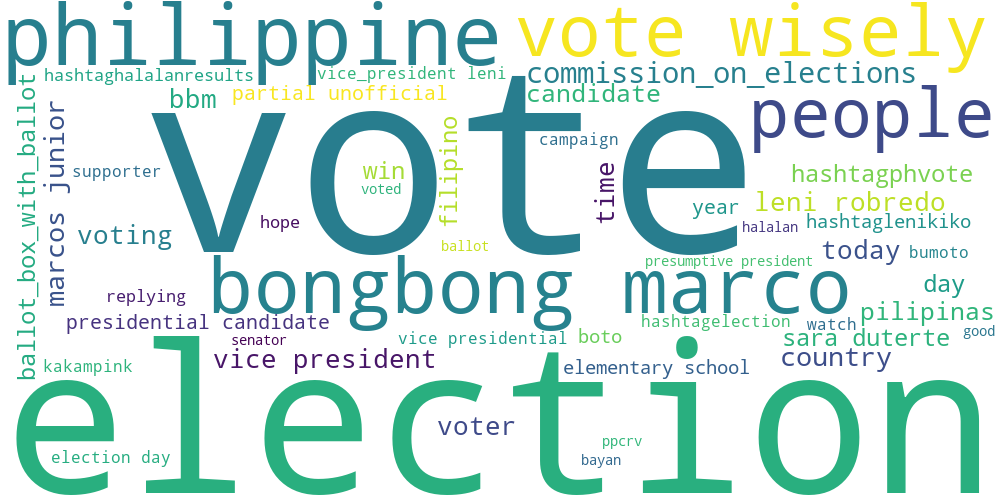

In [56]:
# The use of wordcloud to check if all steps were done correctly
from wordcloud import WordCloud

long_string = ','.join(list(dataset['Corrected_Words'].values))
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',width=1000, height=500)
wordcloud.generate(long_string)
wordcloud.to_image()

## Topic Modeling

In [63]:
import gensim
from gensim import corpora
import numpy as np

documents = dataset['Corrected_Words'].values
tokenized_documents = [doc.split(",") for doc in documents] 

#Create Dictionary
id2word = corpora.Dictionary(tokenized_documents)

#Create Corpus
texts = tokenized_documents

#Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_documents] 

In [64]:
# Build the LDA model
num_topics = 4 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.011*" boto" + 0.008*" news" + 0.008*" enraged_face" + 0.006*" susunod" + 0.006*" matapos" + 0.005*" bansa" + 0.005*" facebook" + 0.005*" araw" + 0.005*" tapos" + 0.005*" eleksyon"
Topic 1: 0.035*" election" + 0.028*" vote" + 0.016*" commission_on_elections" + 0.011*" national" + 0.010*" partylist" + 0.009*"commission_on_elections" + 0.008*" hashtagphilippines" + 0.007*" group" + 0.007*" majority" + 0.006*" poll"
Topic 2: 0.039*" president" + 0.038*" marcos" + 0.026*" bongbong" + 0.020*" vice" + 0.018*" duterte" + 0.016*" sara" + 0.015*" junior" + 0.012*" presidential" + 0.012*" presumptive" + 0.011*" senator"
Topic 3: 0.034*" philippine" + 0.013*" country" + 0.010*" people" + 0.010*" rolling_on_the_floor_laughing" + 0.010*" pilipinas" + 0.008*" filipino" + 0.008*" hashtagelectionaftermath" + 0.007*" hashtagbbmsarauniteam" + 0.007*" leni" + 0.006*" green_heart"


In [66]:
document_topics = []
for doc_bow in corpus:
    topics = lda_model[doc_bow]
    document_topics.append(topics)

print(f"Topics for Overall Tweets: {document_topics[0]}")

Topics for Pre-Election Tweets: ([(0, 0.029082876), (1, 0.48398894), (2, 0.18636434), (3, 0.3005638)], [(0, [1]), (1, [1, 2]), (2, [1, 3, 2]), (3, [3]), (4, [1, 3]), (5, [3]), (6, [2]), (7, [1])], [(0, [(1, 0.98308223)]), (1, [(1, 0.7214957), (2, 0.2783917)]), (2, [(1, 0.36087936), (2, 0.08135419), (3, 0.25144163)]), (3, [(3, 0.9993948)]), (4, [(1, 0.8786861), (3, 0.10798858)]), (5, [(3, 0.9887449)]), (6, [(2, 0.99932706)]), (7, [(1, 0.9973037)])])


### Coherence Score

In [65]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [67]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.46090635427032545


### Finding the Optimal Number of Topics

In [68]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [69]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=8, step=1)

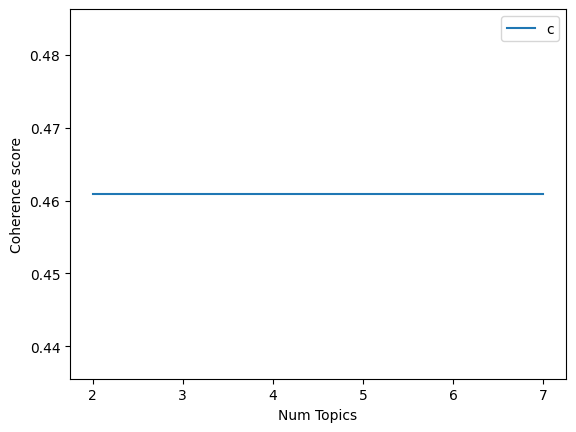

In [70]:
limit=8
start=2
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

In [71]:
for m, cv in zip(x, coherence_values):
    print("Number of Topics =", m, "has Coherence Value of", round(cv,4))

Number of Topics = 2 has Coherence Value of 0.4609
Number of Topics = 3 has Coherence Value of 0.4609
Number of Topics = 4 has Coherence Value of 0.4609
Number of Topics = 5 has Coherence Value of 0.4609
Number of Topics = 6 has Coherence Value of 0.4609
Number of Topics = 7 has Coherence Value of 0.4609


### Topic Modeling Visualization

In [72]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(background_color='white', width=2500, height=2800, max_words=20,
                         colormap='tab10', color_func=lambda * args, **kwargs: cols[i],
                         prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
topics

[(0,
  [(' boto', 0.011178273),
   (' news', 0.008357563),
   (' enraged_face', 0.007886),
   (' susunod', 0.0058823577),
   (' matapos', 0.005723124),
   (' bansa', 0.005094633),
   (' facebook', 0.004945548),
   (' araw', 0.004774772),
   (' tapos', 0.0047024977),
   (' eleksyon', 0.004655844)]),
 (1,
  [(' election', 0.035499714),
   (' vote', 0.028413167),
   (' commission_on_elections', 0.016009318),
   (' national', 0.011491849),
   (' partylist', 0.010407818),
   ('commission_on_elections', 0.008581051),
   (' hashtagphilippines', 0.007984523),
   (' group', 0.0069224834),
   (' majority', 0.006576717),
   (' poll', 0.005787413)]),
 (2,
  [(' president', 0.038899094),
   (' marcos', 0.037744846),
   (' bongbong', 0.02601493),
   (' vice', 0.019797511),
   (' duterte', 0.018148491),
   (' sara', 0.01600291),
   (' junior', 0.015052451),
   (' presidential', 0.01216408),
   (' presumptive', 0.011768657),
   (' senator', 0.011196547)]),
 (3,
  [(' philippine', 0.03350786),
   (' co

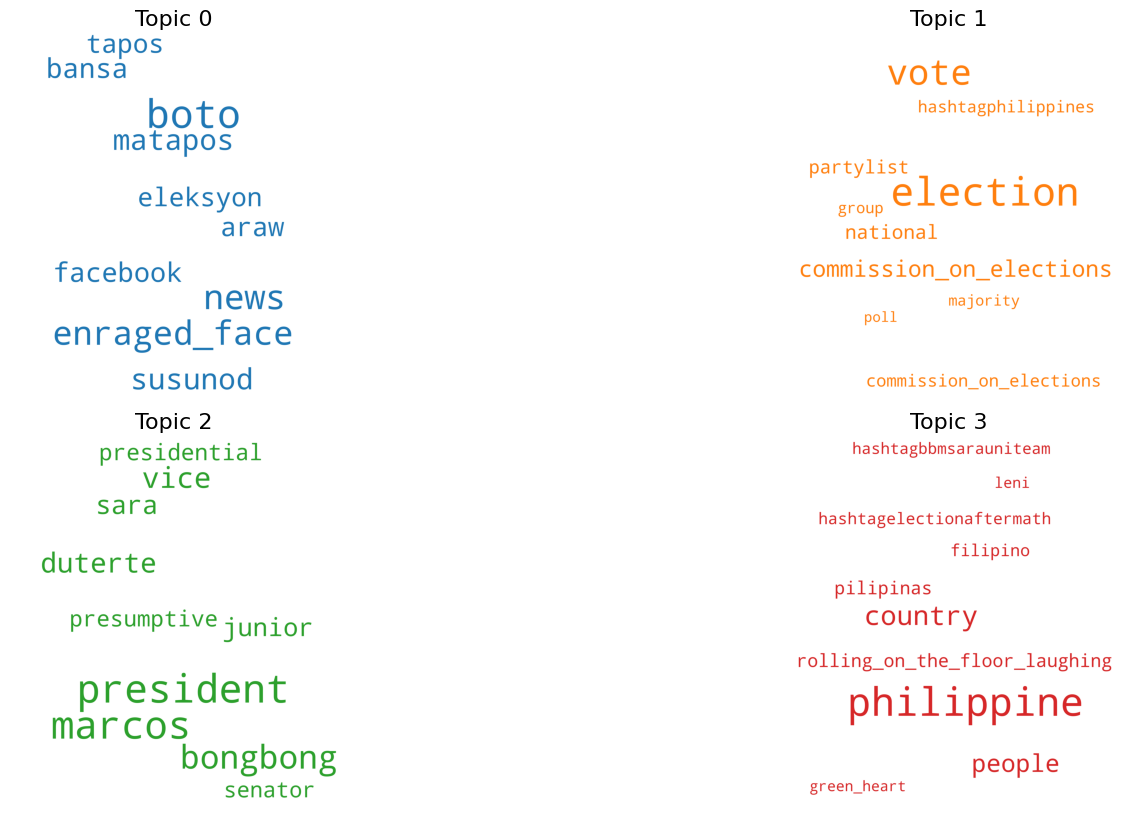

In [73]:
fig, axes = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words,max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic '+ str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout
plt.show()


# Sentiment Analysis

### Emoji Sentiment Analysis

#### Create another Dataframe which contains only emojis

In [74]:
emojies_df = dataset["Emoji"]

In [75]:
emojies_df.to_frame(name="Emoji")

,Emoji
0,winking_face
1,
2,"red_heart, green_heart"
3,
4,
...,...
13282,
13283,
13284,
13285,


#### Emoji Extraction

In [76]:
#Remove whitespaces & extra commas from main emoji column to prepare for split
emojies_df = emojies_df.str.strip('')
emojies_df = emojies_df.str.strip(' ')
emojies_df = emojies_df.str.strip(',')
emojies_df

0                  winking_face
1                              
2        red_heart, green_heart
3                              
4                              
                  ...          
13282                          
13283                          
13284                          
13285                          
13286                          
Name: Emoji, Length: 13287, dtype: object

In [77]:
emojies_df = emojies_df.str.split(",",expand=True)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,winking_face,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,red_heart,green_heart,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13283,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13284,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
13285,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [78]:
emojies_df = emojies_df.replace(np.nan, 0)
emojies_df = emojies_df.replace('', 0)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,winking_face,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,red_heart,green_heart,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
def add_colon(value):
    if value != 0:
        return f":{value}:"
    return value

emojies_df = emojies_df.map(add_colon)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,:winking_face:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,:red_heart:,: green_heart:,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
def remove_whitespace(value):
    if value != 0:
        return value.replace(" ", "")
    return value

emojies_df = emojies_df.map(remove_whitespace)
emojies_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,:winking_face:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,:red_heart:,:green_heart:,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Renaming column names for better labelling

column_name_prefix = "Emoji_"
emojies_df.columns = [column_name_prefix + str(col) for col in emojies_df.columns]
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_26,Emoji_27,Emoji_28,Emoji_29,Emoji_30,Emoji_31,Emoji_32,Emoji_33,Emoji_34,Emoji_35
0,:winking_face:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,:red_heart:,:green_heart:,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#Transform Text to Emojis
def transform_text(value):
    if value != 0:
        value = emoji.emojize(value)
    return value 

emojies_df = emojies_df.map(transform_text)
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_26,Emoji_27,Emoji_28,Emoji_29,Emoji_30,Emoji_31,Emoji_32,Emoji_33,Emoji_34,Emoji_35
0,😉,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,❤️,💚,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### For Missing Emojis

It was seen that there were some unicode / textualized emojis not converted into emojis. Through checking documentation provided by the owner of the emoji package, it was seen that the formatting for the selected emojis are different than what was stated in this webpage (https://carpedm20.github.io/emoji/). Therefore, through the creation of a dictionary, the researchers placed the textualized emojis not converted into one column, and their form in the other. Other words not converting to emojis were also added. As well as underscores that were mistakenly assumed as emojis.

Some emojis were converted into their basic form without specification for skin color and to alternatives.

In [92]:
# Create Missing Emojis Dictionary
missing_dict = {}
missing = pd.read_csv('UpdatedEmojis.csv', encoding='utf-8')
with open('UpdatedEmojis.csv', mode='r') as inp:
    reader = csv.reader(inp)
    headers = next(reader)
    missing_dict = {rows[0]:rows[1] for rows in reader}
missing_dict

{':backhand_index_pointing_down_mediumdark_skin_tone:': ':backhand_index_pointing_down:',
 ':backhand_index_pointing_down_mediumlight_skin_tone:': ':backhand_index_pointing_down_medium-light_skin_tone:',
 ':clapping_hands_mediumlight_skin_tone:': ':clapping_hands_medium-light_skin_tone:',
 ':DepEd_PH:': 'DepEd_PH',
 ':flexed_biceps_mediumlight_skin_tone:': ':flexed_biceps:',
 ':folded_hands_mediumdark_skin_tone:': ':folded_hands_medium-dark_skin_tone:',
 ':folded_hands_mediumlight_skin_tone:': ':folded_hands_medium-light_skin_tone:',
 ':globe_showing_AsiaAustralia:': ':globe_showing_Asia-Australia:',
 ':globe_showing_EuropeAfrica:': ':globe_showing_Europe-Africa:',
 ':hand_with_index_finger_and_thumb_crossed_mediumlight_skin_tone:': ':hand_with_index_finger_and_thumb_crossed_medium-light_skin_tone:',
 ':hashtagELEKSYON_DISCUSSION:': 'hashtagELEKSYON_DISCUSSION',
 ':hashtagFinney_Smith:': 'hashtagFinney_Smith',
 ':hashtagmartial_law:': 'hashtagmartial_law',
 ':hashtagTCPH_ANNOUNCEMENT:'

In [93]:
emojies_df = emojies_df.replace(missing_dict)
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_26,Emoji_27,Emoji_28,Emoji_29,Emoji_30,Emoji_31,Emoji_32,Emoji_33,Emoji_34,Emoji_35
0,😉,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,❤️,💚,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Transform Text to Emojis
def transform_text(value):
    if value != 0:
        value = emoji.emojize(value)
    return value 

emojies_df = emojies_df.map(transform_text)
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_26,Emoji_27,Emoji_28,Emoji_29,Emoji_30,Emoji_31,Emoji_32,Emoji_33,Emoji_34,Emoji_35
0,😉,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,❤️,💚,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Start of Emoji Sentiment Analysis

In [96]:
from emosent import get_emoji_sentiment_rank
def get_sentiment(emoji):
    if emoji:
        try:
            sentiment = get_emoji_sentiment_rank(emoji)
            if sentiment:
                return sentiment['sentiment_score']
            else:
                return 0
        except KeyError:
            return 0
    else:
        return 0

In [97]:
emojies_df = emojies_df.applymap(get_sentiment)
emojies_df

C:\Users\casti\AppData\Local\Temp\ipykernel_21368\889906810.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emojies_df = emojies_df.applymap(get_sentiment)


,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_26,Emoji_27,Emoji_28,Emoji_29,Emoji_30,Emoji_31,Emoji_32,Emoji_33,Emoji_34,Emoji_35
0,0.464,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13283,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13284,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13285,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
emoji_sentiment = emojies_df.loc[:, (emojies_df!=0).any(axis=0)]
emoji_sentiment

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Emoji_6,Emoji_7,Emoji_8,Emoji_9,...,Emoji_26,Emoji_27,Emoji_28,Emoji_29,Emoji_30,Emoji_31,Emoji_32,Emoji_33,Emoji_34,Emoji_35
0,0.464,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13283,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13284,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13285,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
non_zero_columns = (emojies_df != 0).any(axis=0)
emoji_senti = emojies_df.loc[:, non_zero_columns]

# Replace empty lists and/or numerical zeros with NaN
emoji_senti = emoji_senti.applymap(lambda x: np.nan if x == 0 or (isinstance(x, list) and len(x) == 0) else x)
result_df = pd.DataFrame({'emoji_sentiments': emoji_senti.stack().dropna().reset_index(drop=True)})
print(result_df)

      emoji_sentiments
0                0.464
1                0.659
2               -0.093
3                0.652
4                0.652
...                ...
2916             0.229
2917             0.180
2918             0.221
2919             0.303
2920             0.633

[2921 rows x 1 columns]


C:\Users\casti\AppData\Local\Temp\ipykernel_21368\4000252359.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emoji_senti = emoji_senti.applymap(lambda x: np.nan if x == 0 or (isinstance(x, list) and len(x) == 0) else x)


In [100]:
def classify_sentiment(scores):
    scores = [float(value.strip(" []")) for value in str(scores).split(',') if value.strip(" []")]

    closest_score = max(scores, key=lambda x: abs(x), default=0.0)

    if closest_score > 0.1:
        return 'Positive'
    elif closest_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

result_df['sentiment_class'] = result_df['emoji_sentiments'].apply(classify_sentiment)
print(result_df)

      emoji_sentiments sentiment_class
0                0.464        Positive
1                0.659        Positive
2               -0.093         Neutral
3                0.652        Positive
4                0.652        Positive
...                ...             ...
2916             0.229        Positive
2917             0.180        Positive
2918             0.221        Positive
2919             0.303        Positive
2920             0.633        Positive

[2921 rows x 2 columns]


In [101]:
combined_df = pd.concat([dataset, result_df[['emoji_sentiments', 'sentiment_class']]], axis=1)
combined_df = combined_df.drop('Emoji', axis=1)
print(combined_df)


                                                   Tweet  \
0      A year ago Any progress from the winning candi...   
1      Bongbong Marcos Sara Duterte express deepest g...   
2      I decide I only vote for BBM red_heart SARA DU...   
3      Mr Bbm and Ms Sara Duterte are obviously will ...   
4      THE CROWD IS INSANE BBM YOULL FOREVER BE INSAN...   
...                                                  ...   
13282  Dictator Ferdinand Marcos from the Philippines...   
13283  This election rewrites history People voted fo...   
13284  Hey its a free country No one has monopoly of ...   
13285                      HALAlan hashtagElection2022PH   
13286  Cheating malalim na sugat kahit mahilom mahira...   

                                        Tokenized_Tweets  \
0      [a, year, ago, any, progress, from, the, winni...   
1      [bongbong, marcos, sara, duterte, express, dee...   
2      [i, decide, i, only, vote, for, bbm, red_heart...   
3      [mr, bbm, and, ms, sara, duterte

## Text Sentiment Analysis

In [108]:
# Polararity Classification using SWN
def detect_language(word):
    # detect the language of the word
    lang, _ = langid.classify(word)
    return lang

def get_sentiment_score(word, language):
    sentiment = swn.senti_synsets(word)
    pos_score = neg_score = obj_score = count = 0
    
    for synset in sentiment:
        pos_score += synset.pos_score()
        neg_score += synset.neg_score()
        obj_score += synset.obj_score()
        count += 1
    
    if count == 0:
        return {'positive': 0.0, 'negative': 0.0, 'neutral': 0.0}
    
    pos_score /= count
    neg_score /= count
    
    pos_score = max(-1, min(1, pos_score))
    neg_score = max(-1, min(1, neg_score))
    obj_score = max(-1, min(1, obj_score))
    
    return {'positive': pos_score, 'negative': neg_score, 'neutral': obj_score}

def calculate_sentiment(text):
    words = word_tokenize(text)
    
    if not words:
        return {'positive': 0.0, 'negative': 0.0, 'neutral': 0.0}
 
    sentiment_scores = []
    for word in words:
        lang = detect_language(word)
        sentiment_scores.append(get_sentiment_score(word, lang))
    
    overall_sentiment = {'positive': 0.0, 'negative': 0.0, 'neutral': 0.0}
    for score in sentiment_scores:
        overall_sentiment['positive'] += score['positive']
        overall_sentiment['negative'] += score['negative']
        overall_sentiment['neutral'] += score['neutral']
    
    overall_sentiment['positive'] /= len(sentiment_scores)
    overall_sentiment['negative'] /= len(sentiment_scores)
    overall_sentiment['neutral'] /= len(sentiment_scores)
    
    return overall_sentiment

combined_df['Sentiment_Scores'] = combined_df['Corrected_Words'].apply(calculate_sentiment)
combined_df['Positive_Values'] = combined_df['Sentiment_Scores'].apply(lambda scores: scores['positive'])
combined_df['Negative_Values'] = combined_df['Sentiment_Scores'].apply(lambda scores: scores['negative'])
combined_df['Neutral_Values'] = combined_df['Sentiment_Scores'].apply(lambda scores: scores['neutral'])
combined_df['Overall_Text_Sentiment'] = combined_df['Sentiment_Scores'].apply(
    lambda scores: 'Positive' if scores['positive'] > scores['negative'] else ('Negative' if scores['negative'] > scores['positive'] else 'Neutral')
)

combined_df = combined_df.drop('Sentiment_Scores', axis=1)

21368 | INFO | initializing identifier


In [109]:
# Rearrange Columns
combined_df = combined_df[['Tweet', 'Tokenized_Tweets', 'Corrected_Words', 'Positive_Values', 'Negative_Values', 'Neutral_Values', 'Overall_Text_Sentiment', 'emoji_sentiments', 'sentiment_class']]

### Data Visualization

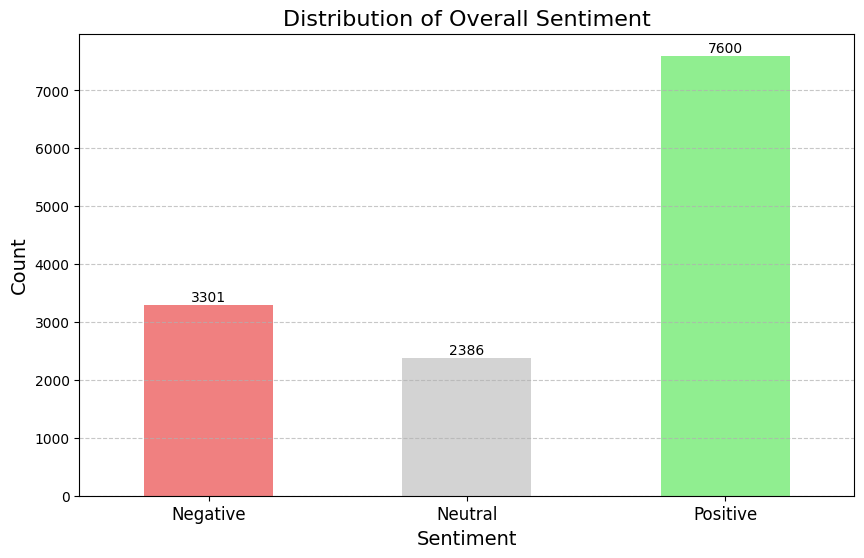

In [110]:
sentiment_counts = combined_df['Overall_Text_Sentiment'].value_counts()
colors = {'Positive': 'lightcoral', 'Negative': 'lightgray', 'Neutral': 'lightgreen'}

plt.figure(figsize=(10, 6))
sentiment_counts.sort_index().plot(kind='bar', color=[colors[s] for s in sentiment_counts.index])

plt.title('Distribution of Overall Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='horizontal', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(sentiment_counts.sort_index()):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()


C:\Users\casti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\casti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\casti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

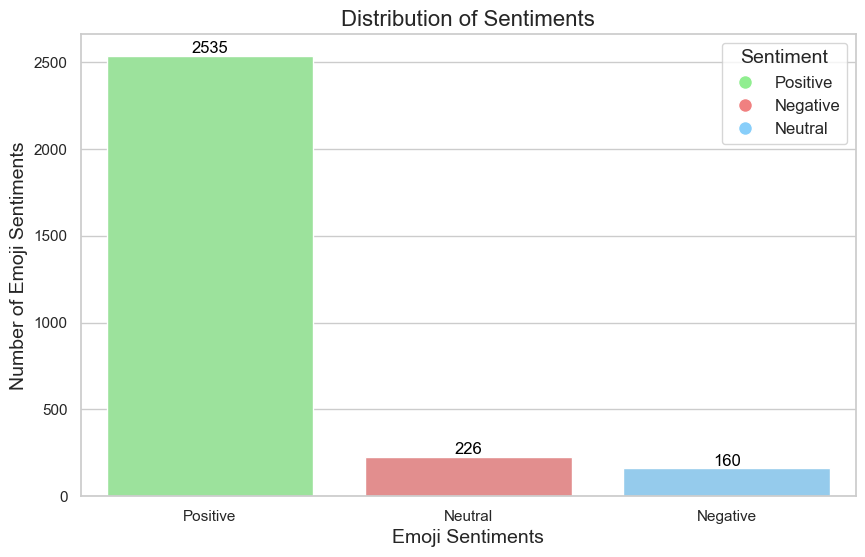

In [111]:
sentiment_counts = combined_df['sentiment_class'].value_counts()

colors = {'Positive': 'lightgreen', 'Negative': 'lightcoral', 'Neutral': 'lightskyblue'}
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors.values())
plt.xlabel('Emoji Sentiments', fontsize=14)
plt.ylabel('Number of Emoji Sentiments', fontsize=14)
plt.title('Distribution of Sentiments', fontsize=16)

for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=12, color='black')

# LEGEND
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[key], markersize=10, label=key)
                 for key in colors.keys()]

plt.legend(handles=legend_labels, title='Sentiment', title_fontsize='14', fontsize='12')
plt.show()
